<a href="https://colab.research.google.com/github/yoonjong8739/NLP_study/blob/master/_7_%EC%9E%84%EB%B2%A0%EB%94%A9(Embedding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 임베딩(Embedding)

* 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
* 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현 방법이 연구
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델 투입도 가능

## 인코딩(Encoding)

* 기계는 자연어(영어, 한국어 등)을 이해할 수 없음
* 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요
* 이러한 작업을 인코딩이라고 함

* 텍스트 처리에서는 주로 정수 인코딩, 원 핫 인코딩을 사용

### 정수 인코딩

#### dictionary를 이용한 정수 인코딩

* 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

In [ ]:
text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."

tokens = [ x for x in text.split(' ') ]
unique = list(set(tokens))

token2idx = {}
for i in range(len(unique)):
    token2idx[unique[i]] = i

encode = [ token2idx[x] for x in tokens ]
encode

[3, 6, 5, 2, 7, 4, 0, 1, 5, 8, 9]

#### keras를 이용한 정수 인코딩

* 정수 인코딩은 단어에 정수로 레이블을 부여
* `dictionary`, `nltk` 패키지를 이용한 방법들도 있지만, `keras`에서는 텍스트 처리에 필요한 도구들을 지원
* 해당 도구는 자동으로 단어 빈도가 높은 단어의 인덱스는 낮게끔 설정

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."

t = Tokenizer()
t.fit_on_texts([text]) # 단어 인덱스 구축
print(t.word_index)  # Tokenizer가 생성한 사전에서 단어에 대한 인덱스를 확인

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


### 원 핫 인코딩(One-Hot Encoding)

#### 조건문과 반복문을 이용한 원 핫 인코딩

* 원 핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
* 원 핫 인코딩은 전체 단어 개수 만큼의 길이를 가진 배열에 해당 정수를 가진 위치는 1, 나머지는 0을 가진 벡터로 변환   

In [ ]:
import numpy as np

one_hot = []

for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i] - 1):
            temp.append(1)
        else:
            temp.append(0)
    one_hot.append(temp)

np.array(one_hot)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

#### keras를 이용한 원 핫 인코딩

* `keras`에서는 정수 인코딩을 원 핫 인코딩을 간단하게 변환해주는 `to_categorical()` 함수를 제공

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils
one_hot = to_categorical(encoded)
one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

### 데이터 로드

In [ ]:
num_words = 1000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


### 데이터 확인
- 긍정: 1
- 부정: 0

In [ ]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [ ]:
for i in range(10):
    if y_train[i] == 0:
        label = '부정'
    else:
        label = '긍정'
    print("{}\n{}".format(x_train[i], label))

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 2

### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

In [ ]:
from tensorflow.keras.utils import pad_sequences

In [ ]:
max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [ ]:
print(len(x_train[0]))
print(len(pad_x_train[0]))

218
100


In [ ]:
print(x_train[0])
print(pad_x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  2  33   6  22  12 215  28  77  52   5  14 407  16  82   2   8   4 107
 117   2  15 256   4   2   7   2   5 723  36  71  43 530

### 모델 구성

In [ ]:
model = Sequential()

model.add(
    Embedding(input_dim=num_words, output_dim=32, input_length=max_len)
)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 학습

In [ ]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [ ]:
history = model.fit(
    pad_x_train, y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/10
625/625 [==============================] - 20s 23ms/step - loss: 0.5738 - acc: 0.7079 - val_loss: 0.4273 - val_acc: 0.8098
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3788 - acc: 0.8328 - val_loss: 0.3826 - val_acc: 0.8246
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3371 - acc: 0.8540 - val_loss: 0.3821 - val_acc: 0.8268
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3085 - acc: 0.8699 - val_loss: 0.3889 - val_acc: 0.8246
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2774 - acc: 0.8867 - val_loss: 0.3961 - val_acc: 0.8234
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2455 - acc: 0.9046 - val_loss: 0.4030 - val_acc: 0.8198
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2127 - acc: 0.9230 - val_loss: 0.4243 - val_acc: 0.8144
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 

### 시각화

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

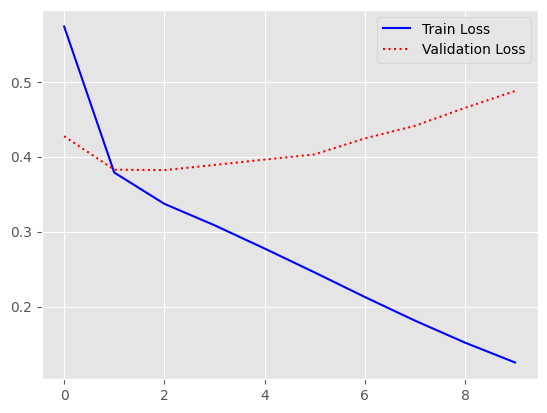

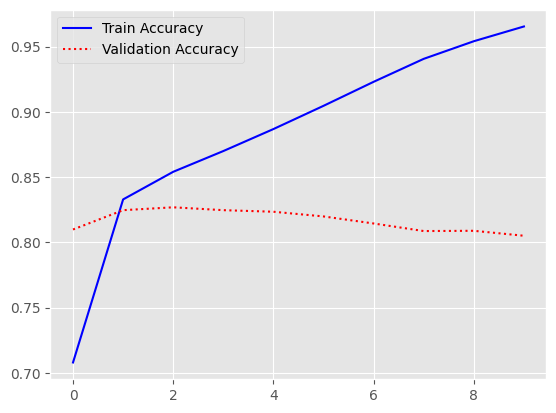

In [ ]:
plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid(True)
plt.show();

plt.plot(hist_dict['acc'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show();

### 모델 평가

In [ ]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4817 - acc: 0.8069


[0.4817155599594116, 0.806879997253418]

### 단어의 수를 늘린 후 재학습

In [ ]:
num_words = 2000
max_len = 400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

pad_x_train2 = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test2 = pad_sequences(x_test, maxlen=max_len, padding='pre')

데이터 확인

In [ ]:
print(x_train[0])
print(pad_x_train2[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    

In [ ]:
model = Sequential()

model.add(
    Embedding(input_dim=num_words, output_dim=32, input_length=max_len)
)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           64000     
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [ ]:
history2 = model.fit(
    pad_x_train2, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
625/625 [==============================] - 38s 60ms/step - loss: 0.5167 - acc: 0.7344 - val_loss: 0.3471 - val_acc: 0.8568
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2918 - acc: 0.8787 - val_loss: 0.3063 - val_acc: 0.8762
Epoch 3/10
625/625 [==============================] - 6s 9ms/step - loss: 0.2373 - acc: 0.9060 - val_loss: 0.3021 - val_acc: 0.8804
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.1941 - acc: 0.9255 - val_loss: 0.3232 - val_acc: 0.8730
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1530 - acc: 0.9465 - val_loss: 0.3334 - val_acc: 0.8698
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1149 - acc: 0.9655 - val_loss: 0.3524 - val_acc: 0.8672
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.0841 - acc: 0.9773 - val_loss: 0.3820 - val_acc: 0.8632
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss:

In [ ]:
hist_dict2 = history2.history
hist_dict2.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

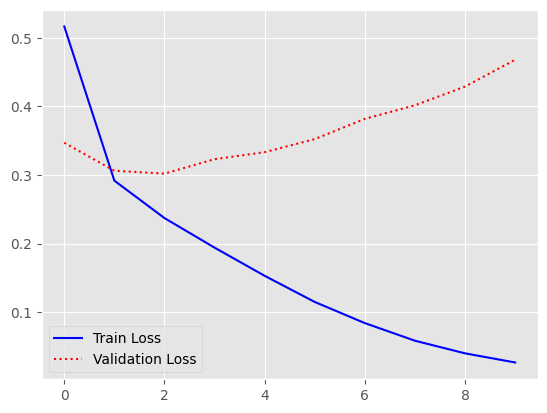

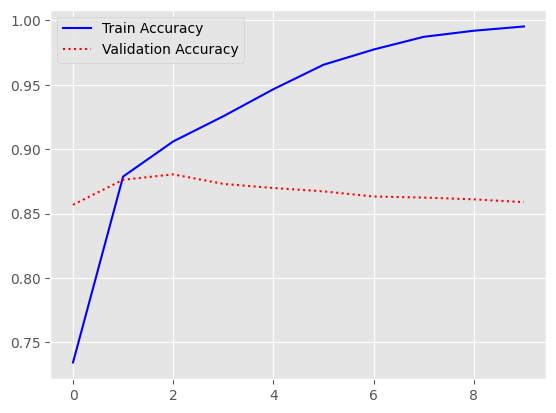

In [ ]:
plt.plot(hist_dict2['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict2['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid(True)
plt.show();

plt.plot(hist_dict2['acc'], 'b-', label='Train Accuracy')
plt.plot(hist_dict2['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show();

In [ ]:
model.evaluate(pad_x_test2, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4643 - acc: 0.8520


[0.4642532467842102, 0.8519999980926514]

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

## T-SNE

* T-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터들의 구조를 보존하며 저차원으로 사상하는 차원 축소 알고리즘
* 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 이 T-SNE 알고리즘을 많이 이용

* t-sne는 가장 먼저 원 공간의 데이터 유사도 $p_{ij}$와 임베딩 공간의 데이터 유사도 $q_{ij}$를 정의
* $x_i$에서 $x_j$ 간의 유사도 $p_{j|i}$ 는 다음과 같이 정의

$$ p_{j|i} = \frac {exp({-|x_i - x_j|}^2 / 2  \sigma^2_i)}{\sum_{k \neq i}exp({-|x_i - x_k|}^2 / 2  \sigma^2_i)} $$

* 설명하자면 $p_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 가중치 $\sigma^2_i$로 나눈 후, 이를 negative exponential을 취해 모든 점 간의 거리의 합과 나누어준 값으로 두 점 간의 거리가 가까울 수록 큰 값을 가짐

* 또한 임베딩 공간에서의 $y_i$에서 $y_j$ 간의 유사도 $q_{j|i}$ 는 다음과 같이 정의

$$ q_{j|i} = \frac {(1 + |y_i-y_j|^2)^{-1}}{\sum_{k \neq l}(1 + |y_i-y_j|^2)^{-1}} $$

* $q_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 1을 더해준 후 역수를 취한 값과 전체 합산 값과 나누어 유사도를 정의

* T-SNE의 학습은 $p_{j|i}$와 비슷해지도록 $q_{j|i}$의 위치를 조정하는 것이라고 할 수 있음



## 데이터 준비

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))

documents = dataset.data

print(len(documents))
documents[2]

11314


"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to continue this think tank charade of yours, your\nfixation on Israel must stop.  You might have to start asking the\nsame sort of questions of Arab countries as well.  You realize it\nwould not work, as the Arab countries' treatment of Jews over the\nlast several decades is so bad that your fixation on Israel would\nbegin to look like the biased attack that it is.\n\n   Everyone in this group recognizes that your stupid 'Center for\nPolicy Research' is nothing more than a fancy name for some bigot\nwho hates Israel."

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([ w.lower() for w in d.split() if w.lower not in stop_words and len(w) > 3 ])

def tokenize(d):
    return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd

news_df = pd.DataFrame({'article' : documents})
len(news_df)

11314

In [ ]:
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))

11096


In [ ]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        Well im not sure about the story nad it did se...
1        \n\n\n\n\n\n\nYeah do you expect people to rea...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well I will have to change the scoring on my p...
                               ...                        
11309    Danny Rubenstein an Israeli journalist will be...
11310                                                   \n
11311    \nI agree  Home runs off Clemens are always me...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          \nNo arg...
Name: article, Length: 11096, dtype: object

In [ ]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        well sure about story seem biased what disagre...
1        yeah expect people read actually accept hard a...
2        although realize that principle your strongest...
3        notwithstanding legitimate fuss about this pro...
4        well will have change scoring playoff pool unf...
                               ...                        
11309    danny rubenstein israeli journalist will speak...
11310                                                     
11311    agree home runs clemens always memorable kinda...
11312    used deskjet with orange micros grappler syste...
11313    argument with murphy scared hell when came las...
Name: article, Length: 11096, dtype: object

In [ ]:
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news = tokenized_news.tolist()

In [ ]:
import numpy as np

drop_news = [ index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1 ]
news_texts = np.delete(tokenized_news, drop_news, axis = 0)
print(len(news_texts))

10958


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


## Gensim을 이용한 Word2Vec

### CBOW

In [ ]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(
    sentences=news_texts,
    sg=0,  # 1:skip-gram, 0:CBOW
    vector_size=100,
    window=4,  # 앞 뒤 몇 개의 단어까지 예측하는데 사용할 것인가?
    min_count=5,  # 사용할 단어의 최소 빈도 수
    workers=4  # 동시 처리 수
)

In [ ]:
model.wv.similarity('people', 'journalist')  # people, journalist 유사도

0.41017118

In [ ]:
model.wv.most_similar(positive=['soldiers'])  # 가장 유사한 단어를 추출

[('turks', 0.9795730113983154),
 ('armenians', 0.9782506823539734),
 ('azerbaijani', 0.9564399123191833),
 ('turkey', 0.9562862515449524),
 ('civilians', 0.9537200927734375),
 ('kurds', 0.9536581635475159),
 ('villages', 0.9532555341720581),
 ('land', 0.9524915814399719),
 ('troops', 0.9467703700065613),
 ('henrik', 0.9461122751235962)]

In [ ]:
model.wv.most_similar(positive=['king', 'soldiers'], negative=['woman'])

[('officer', 0.9572246074676514),
 ('germany', 0.9500492811203003),
 ('argic', 0.9493251442909241),
 ('empire', 0.946972668170929),
 ('republic', 0.9465391635894775),
 ('ministry', 0.946457028388977),
 ('serdar', 0.9457352161407471),
 ('former', 0.9435791373252869),
 ('cemetery', 0.9388808608055115),
 ('british', 0.9376170635223389)]

### Skip-gram

In [ ]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(
    sentences=news_texts,
    sg=1,  # 1:skip-gram, 0:CBOW
    vector_size=100,
    window=4,  # 앞 뒤 몇 개의 단어까지 예측하는데 사용할 것인가?
    min_count=5,  # 사용할 단어의 최소 빈도 수
    workers=4  # 동시 처리 수
)

In [ ]:
model.wv.similarity('people', 'journalist')  # people, journalist 유사도

0.5322512

In [ ]:
model.wv.most_similar(positive=['soldiers'])  # 가장 유사한 단어를 추출

[('azeri', 0.9069098830223083),
 ('azerbaijanis', 0.9035030603408813),
 ('wounded', 0.9028443098068237),
 ('fleeing', 0.9009941816329956),
 ('civilians', 0.8990879654884338),
 ('escaped', 0.8937729597091675),
 ('girls', 0.8932861089706421),
 ('murdered', 0.8884527087211609),
 ('villages', 0.8879332542419434),
 ('troops', 0.8866099715232849)]

In [ ]:
model.wv.most_similar(positive=['king', 'soldiers'], negative=['woman'])

[('adamdasharvardedu', 0.7202814221382141),
 ('shostack', 0.7174572944641113),
 ('turk', 0.7148272395133972),
 ('isaac', 0.7130662798881531),
 ('rebels', 0.7109370231628418),
 ('haci', 0.7098399996757507),
 ('nagornokarabagh', 0.7086888551712036),
 ('abdullah', 0.7071125507354736),
 ('sarik', 0.7046145796775818),
 ('lamb', 0.6972774863243103)]

### 임베딩 벡터 시각화

In [ ]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('news_w2v')

* metadata.tsv와 tensor.tsv 데이터 생성

In [ ]:
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v

2023-08-02 15:17:26,299 - word2vec2tensor - INFO - running /usr/local/lib/python3.10/dist-packages/gensim/scripts/word2vec2tensor.py -i news_w2v -o news_w2v
2023-08-02 15:17:26,299 - keyedvectors - INFO - loading projection weights from news_w2v
2023-08-02 15:17:27,324 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (17068, 100) matrix of type float32 from news_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-08-02T15:17:27.323500', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]', 'platform': 'Linux-5.15.109+-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}
2023-08-02 15:17:28,832 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2023-08-02 15:17:28,833 - word2vec2tensor - INFO - Tensor metadata file saved to news_w2v_metadata.tsv
2023-08-02 15:17:28,834 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [ ]:
from google.colab import files

files.download('news_w2v_metadata.tsv')
files.download('news_w2v_tensor.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Embedding Projector: https://projector.tensorflow.org/